# French Bakery Analysis
## Authored by Trinity Gahagen
#### Phase 2 Project for Flatiron School
---
---

In [175]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [176]:
bakery = pd.read_csv('Bakery sales.csv', parse_dates=['date'])

In [177]:
bakery.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


## Data Cleaning and Exploration
---

In [178]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   article        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.5+ MB


In [179]:
bakery.describe()

,Unnamed: 0,date,ticket_number,Quantity
count,234005.000000,234005,234005.000000,234005.000000
mean,255205.035854,2021-11-30 11:33:31.049336576,219201.258738,1.538377
min,0.000000,2021-01-02 00:00:00,150040.000000,-200.000000
25%,127979.000000,2021-07-03 00:00:00,184754.000000,1.000000
50%,254573.000000,2021-11-04 00:00:00,218807.000000,1.000000
75%,382911.000000,2022-05-31 00:00:00,253927.000000,2.000000
max,511395.000000,2022-09-30 00:00:00,288913.000000,200.000000
std,147501.625992,NaN,40053.223896,1.289603


In [180]:
bakery.describe(include="O")

,time,article,unit_price
count,234005,234005,234005
unique,683,149,123
top,11:43,TRADITIONAL BAGUETTE,"1,20 €"
freq,859,67689,49080


In [181]:
bakery['Unnamed: 0'].head()

0    0
1    1
2    4
3    5
4    8
Name: Unnamed: 0, dtype: int64

In [182]:
# Unnamed doesn't seem like a useful column, so we'll just drop it
try:
    bakery.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("Column already dropped")

In [183]:
# Clean unit_price column
bakery['unit_price_clean'] = bakery['unit_price'].str.extract("(\d+,\d+)")
bakery['unit_price_clean'] = bakery['unit_price_clean'].str.replace(",", ".").astype(float)
bakery[['unit_price', 'unit_price_clean']].head()

,unit_price,unit_price_clean
0,"0,90 €",0.90
1,"1,20 €",1.20
2,"1,20 €",1.20
3,"1,15 €",1.15
4,"1,20 €",1.20


In [184]:
# Convert to USD
EURO_TO_DOLLAR = 1.08 # 1 Euro = 1.08 USD

bakery['unit_price_usd'] = round(bakery['unit_price_clean'] * EURO_TO_DOLLAR, 2)
bakery['unit_price_usd'].head()

0    0.97
1    1.30
2    1.30
3    1.24
4    1.30
Name: unit_price_usd, dtype: float64

In [185]:
bakery['ticket_number'].nunique()

136451

In [186]:
bakery['total_spent_on_quantity'] = round(bakery['unit_price_usd'] * bakery['Quantity'], 2)
bakery['total_spent_on_quantity'].head()

0    0.97
1    3.90
2    2.60
3    1.24
4    6.50
Name: total_spent_on_quantity, dtype: float64

In [187]:
print(bakery['article'].nunique())
display(bakery['article'].unique())

149


array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [188]:
PERIOD_ARTICLES = bakery['article'] == '.'
bakery[PERIOD_ARTICLES]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
15360,2021-03-04,12:32,159219.0,.,2.0,"0,00 €",0.0,0.0,0.0
19904,2021-03-18,12:59,161853.0,.,1.0,"0,00 €",0.0,0.0,0.0
24959,2021-04-04,09:53,164878.0,.,1.0,"0,00 €",0.0,0.0,0.0
33569,2021-04-27,16:48,170079.0,.,1.0,"0,00 €",0.0,0.0,0.0
61792,2021-07-10,13:25,186662.0,.,2.0,"0,00 €",0.0,0.0,0.0


In [189]:
# Drop articles that just have period, since there's no price associated with them
if len(bakery[PERIOD_ARTICLES]) > 0:
    bakery.drop(bakery[PERIOD_ARTICLES].index, inplace=True)
else:
    print("Already dropped")

In [190]:
# There are negative quantities
bakery.loc[bakery['Quantity'] < 0]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
448,2021-01-03,10:41,150265.0,BAGUETTE,-1.0,"0,90 €",0.90,0.97,-0.97
1162,2021-01-05,19:00,150738.0,SPECIAL BREAD,-1.0,"2,40 €",2.40,2.59,-2.59
1163,2021-01-05,19:00,150738.0,DIVERS PATISSERIE,-1.0,"6,00 €",6.00,6.48,-6.48
1164,2021-01-05,19:00,150738.0,DIVERS BOULANGERIE,-1.0,"2,00 €",2.00,2.16,-2.16
1467,2021-01-08,11:58,150941.0,COUPE,-1.0,"0,15 €",0.15,0.16,-0.16
...,...,...,...,...,...,...,...,...,...
233054,2022-09-27,18:03,288312.0,COUPE,-2.0,"0,15 €",0.15,0.16,-0.32
233055,2022-09-27,18:03,288312.0,TRADITIONAL BAGUETTE,-1.0,"1,30 €",1.30,1.40,-1.40
233056,2022-09-27,18:03,288312.0,CEREAL BAGUETTE,-3.0,"1,35 €",1.35,1.46,-4.38
233553,2022-09-29,11:55,288639.0,BOISSON 33CL,-1.0,"1,50 €",1.50,1.62,-1.62


Here we see that there are negative quantities included in this dataset. From the Kaggle page, the owner of the dataset commented on this, saying:
>Sorry for the delay. Negative quantities might be due to till errors (the huge -200) or refunds


In [191]:
bakery[bakery['Quantity'] > 100]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
50552,2021-06-12,09:58,179931.0,CAFE OU EAU,200.0,"1,00 €",1.0,1.08,216.0


## PLACEHOLDER: Figure out what to do about the negative quantities

In [192]:
# Separating time increments into separate columns for future grouping
bakery['month'] = bakery['date'].dt.month
bakery['year'] = bakery['date'].dt.year
bakery['day_of_the_week'] = bakery['date'].dt.day_of_week


DAY_DICT = {
    0 : "Mon",
    1 : "Tues",
    2 : "Wed",
    3 : "Thurs",
    4 : "Fri",
    5 : "Sat",
    6 : "Sun"
}

MONTH_DICT = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "May",
    6 : "Jun",
    7 : "Jul",
    8 : "Aug",
    9 : "Sep",
    10 : "Oct",
    11 : "Nov",
    12 : "Dec"
}

bakery['month'].replace(MONTH_DICT, inplace=True)
bakery['day_of_the_week'].replace(DAY_DICT, inplace=True)

bakery.head()


,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity,month,year,day_of_the_week
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.97,0.97,Jan,2021,Sat
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,1.30,3.90,Jan,2021,Sat
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,1.30,2.60,Jan,2021,Sat
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.24,1.24,Jan,2021,Sat
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,1.30,6.50,Jan,2021,Sat


## Descriptive Analysis Questions
---

#### What is the daily revenue of the bakery over time?

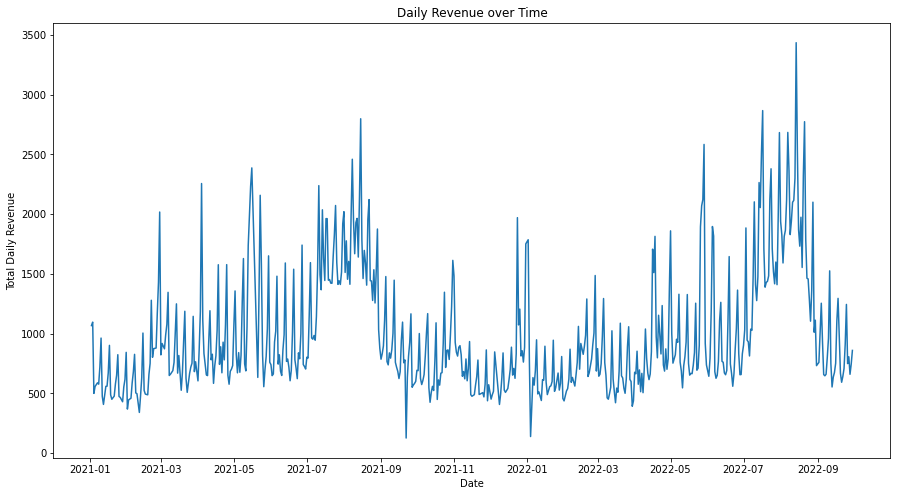

In [193]:
data = bakery.groupby('date')['total_spent_on_quantity'].sum()

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data.index, y=data, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Daily Revenue')
ax.set_title('Daily Revenue over Time');


#### Which days of the week generate the most revenue?

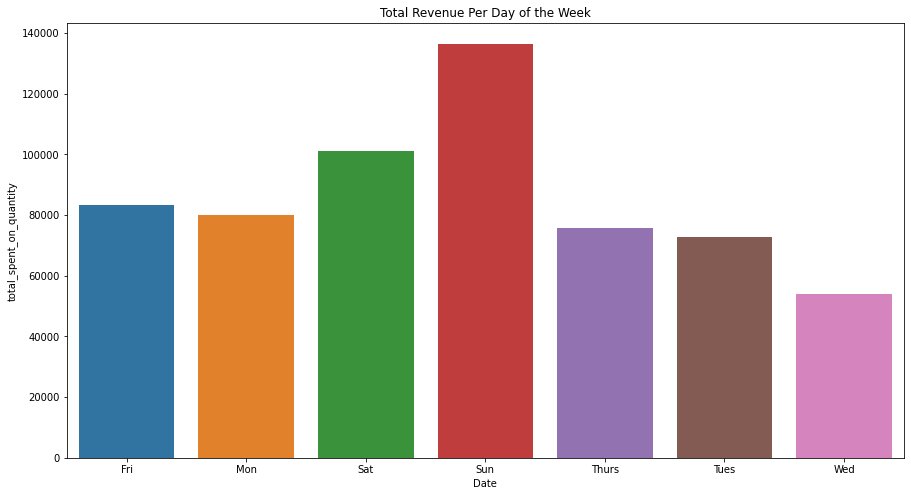

In [194]:
fig, ax = plt.subplots(figsize=(15, 8))

data = bakery.groupby('day_of_the_week')['total_spent_on_quantity'].sum()
sns.barplot(x=data.index, y=data, ax=ax)
ax.set_xlabel('Date')
ax.set_title('Total Revenue Per Day of the Week');

#### Which months generate the most revenue?

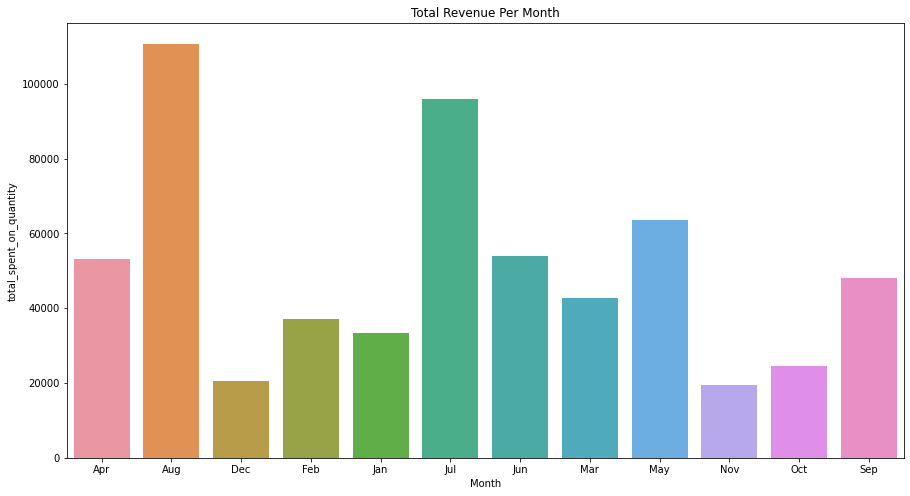

In [195]:
fig, ax = plt.subplots(figsize=(15, 8))

data = bakery.groupby('month')['total_spent_on_quantity'].sum()
sns.barplot(x=data.index, y=data, ax=ax)
ax.set_xlabel('Month')
ax.set_title('Total Revenue Per Month');

#### What products sell the most?

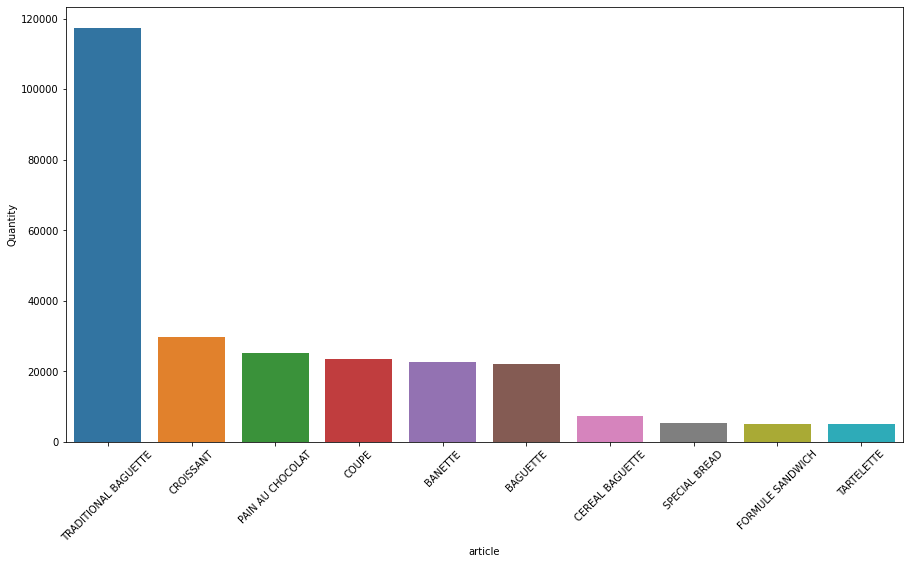

In [196]:
fig, ax = plt.subplots(figsize=(15, 8))
data = bakery.groupby('article')['Quantity'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=data.index, y=data, ax=ax)
ax.tick_params(axis='x', rotation=45)